In [2]:
!pip install opencv-python 
import sys  
sys.path.append('path')

# Foundations of Data Science Coursework (7COM1073)
# University of Hertfordshire — Semester A

# =========================
# Task 1: SVD, PCA, Image Compression
# =========================

Input must be a 2D matrix
Original X:
 [[2 3]
 [0 2]]
Reconstructed X:
 [[-1.2 -3.4]
 [-1.6 -1.2]]
Original image shape: (472, 735, 3)
Grayscale image shape: (472, 735)


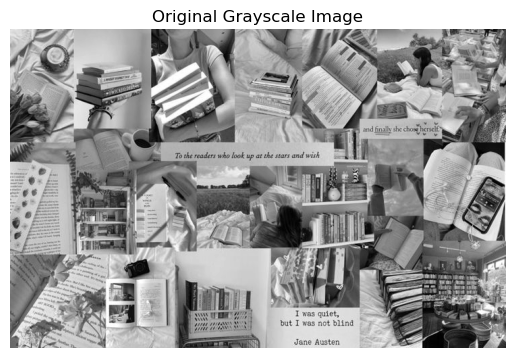

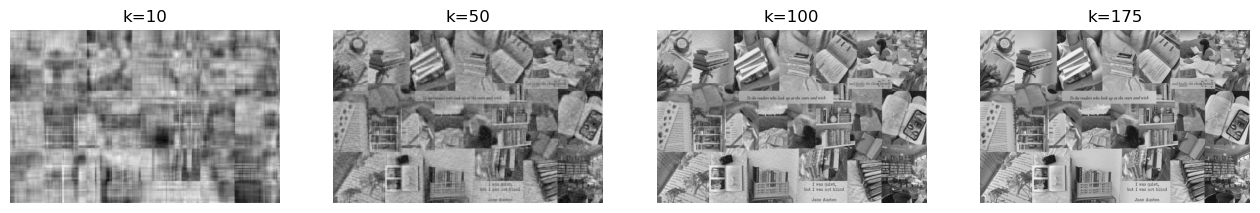

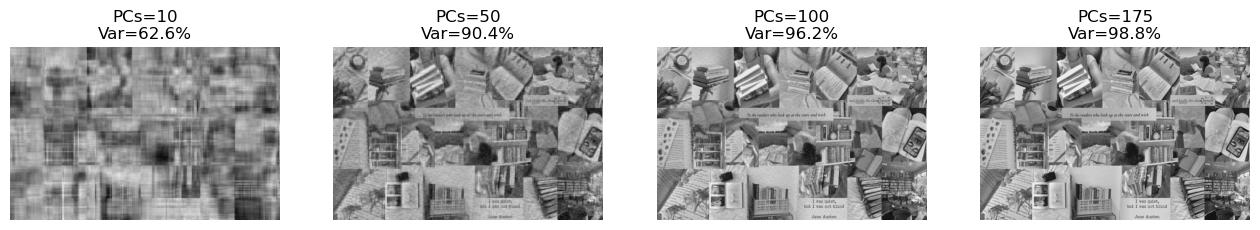

In [7]:


import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

def mysvd(X):
    if len(X.shape) != 2:
        print("Input must be a 2D matrix")
        return None

    AAT = np.dot(X, X.T)
    ATA = np.dot(X.T, X)

    eigvals_U, U = np.linalg.eig(AAT)
    eigvals_V, V = np.linalg.eig(ATA)

    sorted_idx_U = np.argsort(eigvals_U)[::-1]
    sorted_idx_V = np.argsort(eigvals_V)[::-1]

    U = U[:, sorted_idx_U]
    V = V[:, sorted_idx_V]
    singular_vals = np.sqrt(np.sort(eigvals_U)[::-1])

    return U, singular_vals, V


X_invalid = np.array([2, 3])
mysvd(X_invalid)

X_valid = np.array([[2, 3], [0, 2]])
U, s, V = mysvd(X_valid)

# Reconstruct X
S = np.zeros(X_valid.shape)
np.fill_diagonal(S, s)
X_reconstructed = U @ S @ V.T

print("Original X:\n", X_valid)
print("Reconstructed X:\n", X_reconstructed)

# Check orthonormality
def check_orthonormal(mat):
    inner_prod = np.dot(mat.T, mat)
    norms = [np.linalg.norm(mat[:, i]) for i in range(mat.shape[1])]
    return inner_prod, norms

U_inner, U_norms = check_orthonormal(U)
V_inner, V_norms = check_orthonormal(V)

# Compare with numpy.linalg.svd
U_lib, s_lib, Vt_lib = np.linalg.svd(X_valid)

# -------- Task 1c --------
image = cv2.imread('C:/Users/91984/Desktop/eee.jpg')
print("Original image shape:", image.shape)

gray_img = rgb2gray(image)
print("Grayscale image shape:", gray_img.shape)

plt.imshow(gray_img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

U_img, S_img, Vt_img = np.linalg.svd(gray_img, full_matrices=False)

k_values = [10, 50, 100, 175]
fig, axes = plt.subplots(1, len(k_values), figsize=(16, 5))

for idx, k in enumerate(k_values):
    S_reduced = np.diag(S_img[:k])
    compressed_img = U_img[:, :k] @ S_reduced @ Vt_img[:k, :]
    axes[idx].imshow(compressed_img, cmap='gray')
    axes[idx].set_title(f"k={k}")
    axes[idx].axis('off')

plt.show()

# -------- Task 1d --------
mean_centered = gray_img - np.mean(gray_img, axis=0)
pca = PCA()
pca.fit(mean_centered)

fig, axes = plt.subplots(1, len(k_values), figsize=(16, 5))

for idx, k in enumerate(k_values):
    pca_k = PCA(n_components=k)
    transformed = pca_k.fit_transform(mean_centered)
    reconstructed = pca_k.inverse_transform(transformed) + np.mean(gray_img, axis=0)
    axes[idx].imshow(reconstructed, cmap='gray')
    axes[idx].set_title(f"PCs={k}\nVar={np.sum(pca_k.explained_variance_ratio_)*100:.1f}%")
    axes[idx].axis('off')

plt.show()

# =========================
# Task 2: Linear Regression
# =========================

# -------- Task 2a --------


In [6]:
x = np.array([-2, -1, 0, 1, 2]).reshape(-1, 1)
y = np.array([8, 6, 4, 3, -1])

model = LinearRegression()
model.fit(x, y)

slope = model.coef_[0]
intercept = model.intercept_
r2_score = model.score(x, y)

# -------- Task 2b --------
x_new = np.array([[1.5]])
y_new = 0.6
y_pred_new = model.predict(x_new)[0]
residual_new = y_new - y_pred_new
residuals_train = y - model.predict(x)

# -------- Task 2c --------
def manual_metrics(x, y, a1, a0):
    y_pred = a1 * x.flatten() + a0
    residuals = y - y_pred
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2 = 1 - ss_res / ss_tot
    return residuals, r2

res_manual, r2_manual = manual_metrics(x, y, slope, intercept)

# -------- Task 2d --------
print("sklearn R²:", r2_score)
print("Manual R²:", r2_manual)
print("Residuals (manual):", res_manual)
print("Residuals (sklearn):", residuals_train)


sklearn R²: 0.9586956521739131
Manual R²: 0.9586956521739131
Residuals (manual): [-0.2 -0.1  0.   1.1 -0.8]
Residuals (sklearn): [-0.2 -0.1  0.   1.1 -0.8]
